In [32]:
import networkx as nx

def printGraph(pairs):
    DG = nx.DiGraph()
    for pair in pairs:
        DG.add_node(pair[0])
        DG.add_node(pair[1])
        DG.add_edge(pair[0], pair[1])

    pos = nx.spring_layout(DG)
    plt.figure()
    nx.draw(DG, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in DG.nodes()})
    plt.axis('off')
    plt.show()
    
    return DG

In [21]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 



import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [22]:
with open('data/manually_collected/text/0_original.txt', 'r') as handle:
    caption = handle.readlines()[0]
    
with open('data/manually_collected/text/10450.txt', 'r') as handle:
    caption2 = handle.readlines()[0]

In [23]:
doc1 = nlp(caption)
doc2 = nlp(caption2)
caption2

'Everything on the table, from the fluted glass and goblet to the lobster and crab, is indeed life-like. You can almost smell the lemons. The Dutch proudly displayed such expensive status symbols in their homes, the exotic food and material possessions reminding them of the good things in life, even as the watch reminds them of their transience. The bread and wine, in a touch of Christian symbolism, echo the moralizing message of vanitas, or vanity: all earthly things must pass.'

In [24]:
for chunk in doc2:
    print(chunk.text, chunk.tag_)

Everything NN
on IN
the DT
table NN
, ,
from IN
the DT
fluted JJ
glass NN
and CC
goblet VB
to IN
the DT
lobster NN
and CC
crab NN
, ,
is VBZ
indeed RB
life NN
- HYPH
like JJ
. .
You PRP
can MD
almost RB
smell VB
the DT
lemons NNS
. .
The DT
Dutch NNP
proudly RB
displayed VBD
such JJ
expensive JJ
status NN
symbols NNS
in IN
their PRP$
homes NNS
, ,
the DT
exotic JJ
food NN
and CC
material NN
possessions NNS
reminding VBG
them PRP
of IN
the DT
good JJ
things NNS
in IN
life NN
, ,
even RB
as IN
the DT
watch NN
reminds VBZ
them PRP
of IN
their PRP$
transience NN
. .
The DT
bread NN
and CC
wine NN
, ,
in IN
a DT
touch NN
of IN
Christian JJ
symbolism NN
, ,
echo VB
the DT
moralizing NN
message NN
of IN
vanitas NNS
, ,
or CC
vanity NN
: :
all DT
earthly JJ
things NNS
must MD
pass VB
. .


In [25]:
for chunk in doc2.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.dep_,
            chunk.root.head.text)

Everything Everything nsubj ROOT is
the table table pobj prep on
the fluted glass glass pobj prep from
the lobster lobster pobj prep to
crab crab conj pobj lobster
You You nsubj ROOT smell
the lemons lemons dobj ROOT smell
The Dutch Dutch nsubj ROOT displayed
such expensive status symbols symbols dobj ROOT displayed
their homes homes pobj prep in
the exotic food and material possessions possessions nsubj advcl reminding
them them dobj advcl reminding
the good things things pobj prep of
life life pobj prep in
the watch watch nsubj advcl reminds
them them dobj advcl reminds
their transience transience pobj prep of
The bread bread nsubj ccomp echo
wine wine conj nsubj bread
a touch touch pobj prep in
Christian symbolism symbolism pobj prep of
the moralizing message message dobj ccomp echo
vanitas vanitas pobj prep of
vanity vanity conj dobj message
all earthly things things nsubj ROOT pass


In [26]:
# doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
# Since this is an interactive Jupyter environment, we can use displacy.render here
displacy.render(doc2, style='dep')

In [27]:
caption2

'Everything on the table, from the fluted glass and goblet to the lobster and crab, is indeed life-like. You can almost smell the lemons. The Dutch proudly displayed such expensive status symbols in their homes, the exotic food and material possessions reminding them of the good things in life, even as the watch reminds them of their transience. The bread and wine, in a touch of Christian symbolism, echo the moralizing message of vanitas, or vanity: all earthly things must pass.'

In [96]:
nlp = spacy.load("en_core_web_sm")
doc1 = nlp(caption)


In [109]:
for token in doc2:
    if not token.is_stop:
        print(token.lemma_, token.dep_, token.tag_, list(token.head.lefts), list(token.head.rights))

table pobj NN [] [table]
, punct , [] [on, ,, from]
fluted amod JJ [the, fluted] []
glass pobj NN [] [glass, and, goblet]
goblet conj VB [] [glass, and, goblet]
lobster pobj NN [] [lobster]
crab conj NN [the] [and, crab]
, punct , [Everything, ,] [indeed, like, .]
life npadvmod NN [life, -] []
- punct HYPH [life, -] []
like acomp JJ [Everything, ,] [indeed, like, .]
. punct . [Everything, ,] [indeed, like, .]
smell ROOT VB [You, can, almost] [lemons, .]
lemon dobj NNS [You, can, almost] [lemons, .]
. punct . [You, can, almost] [lemons, .]
Dutch nsubj NNP [Dutch, proudly] [symbols, in, ,, reminding, .]
proudly advmod RB [Dutch, proudly] [symbols, in, ,, reminding, .]
display ROOT VBD [Dutch, proudly] [symbols, in, ,, reminding, .]
expensive amod JJ [such, expensive, status] []
status compound NN [such, expensive, status] []
symbol dobj NNS [Dutch, proudly] [symbols, in, ,, reminding, .]
home pobj NNS [] [homes]
, punct , [Dutch, proudly] [symbols, in, ,, reminding, .]
exotic amod JJ [th

In [87]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("merge_entities")
nlp.add_pipe("merge_noun_chunks")

# tokens = [token.lemma_ + ' ' for token in doc2 if not token.is_stop and token.dep_!='det' and token.tag_!='PRP']

tokens = [token.lemma_ + ' ' for token in doc2]

tokens = ''.join(tokens)
print(tokens)

pairs = []

for doc in nlp.pipe([doc2.text]):
    for sentence in doc.sents:
        for token in sentence:
    #         print(token, token.dep_)
            if not token.is_stop:
                if token.dep_ in ("attr", "dobj", "obj", "obl", "xcomp", "advcl", "pobj"):
                    subj = [w for w in token.head.lefts if w.dep_ == "nsubj" or  w.dep_ == "nsubj:pass" or   w.dep_ == "csubj"]


                    if sentence.root.tag != 'VB':
                        subj.extend([w for w in token.head.lefts if w.dep_ == "amod" or  w.dep_ == "nmod" or w.dep_ == "nummod" or w.dep_ == "case" or w.dep_ == "acl" or w.dep_ == "compound"])

                    if subj:
                        print(subj[0].lemma_, "-->", token.lemma_)
                        pairs.append((subj[0].lemma_, token.lemma_))

everything on the table , from the fluted glass and goblet to the lobster and crab , be indeed life - like . you can almost smell the lemon . the Dutch proudly display such expensive status symbol in their home , the exotic food and material possession remind they of the good thing in life , even as the watch remind they of their transience . the bread and wine , in a touch of christian symbolism , echo the moralizing message of vanita , or vanity : all earthly thing must pass . 
you --> the lemon
the Dutch --> such expensive status symbol
the Dutch --> remind
the exotic food and material possession --> remind
the bread --> the moralizing message


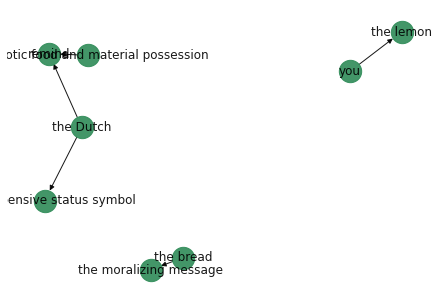

In [86]:
G = printGraph(pairs)

In [49]:
res = nx.descendants(G, 'The bread')

In [50]:
res

{'the moralizing message'}

In [69]:
for token in doc1:
    print(token, token.dep_)

The det
symbolism nsubj
of prep
the det
skulls pobj
in prep
this det
painting pobj
is ROOT
obvious acomp
, punct
but cc
the det
rose nsubj
( punct
quick amod
to aux
wilt xcomp
) punct
and cc
oil compound
lamp conj
( punct
easily advmod
snuffed parataxis
out prt
) punct
also advmod
refer conj
to prep
life poss
’s case
brevity pobj
and cc
fragility conj
. punct
The det
vanitas compound
symbolism nsubjpass
is auxpass
underscored ROOT
by agent
the det
Latin amod
inscription pobj
underneath advmod
: punct
“ punct
All nsubj
that nsubj
is relcl
human acomp
is pcomp
smoke attr
, punct
show conj
, punct
vanity conj
and cc
the det
picture conj
of prep
a det
stage pobj
. punct
” punct


In [11]:
doc1

The symbolism of the skulls in this painting is obvious, but the rose (quick to wilt) and oil lamp (easily snuffed out) also refer to life’s brevity and fragility. The vanitas symbolism is underscored by the Latin inscription underneath: “All that is human is smoke, show, vanity and the picture of a stage.”

In [84]:
nlp = spacy.load("en_core_web_sm")
# nlp.add_pipe("merge_entities")
# nlp.add_pipe("merge_noun_chunks")

# tokens = [token.lemma_ + ' ' for token in doc1 if not token.is_stop and token.dep_!='det' and token.tag_!='PRP']

# tokens = ''.join(tokens)
# print(tokens)

pairs = []

for doc in nlp.pipe([doc1.text]):
    for sentence in doc.sents:
        for token in sentence:
    #         print(token, token.dep_)
            if not token.is_stop:
                if token.dep_ in ("attr", "dobj", "obj", 'pobj', "obl", "xcomp", "advcl"):
                    print(token, [w for w in token.head.rights])
                    subj = [w for w in token.head.lefts if w.dep_ == "nsubj" or  w.dep_ == "nsubj:pass" or   w.dep_ == "csubj"]


                    if sentence.root.tag != 'VB':
                        subj.extend([w for w in token.head.lefts if w.dep_ == "amod" or  w.dep_ == "nmod" or w.dep_ == "nummod" or w.dep_ == "case" or w.dep_ == "acl" or w.dep_ == "compound"])

                    if subj:
                        print(subj[0].lemma_, "-->", token.lemma_)
                        pairs.append((subj[0].lemma_, token.lemma_))

skulls [skulls]
painting [painting]
wilt [wilt]
brevity [brevity]
inscription [inscription]
smoke [smoke]
all --> smoke
stage [stage]


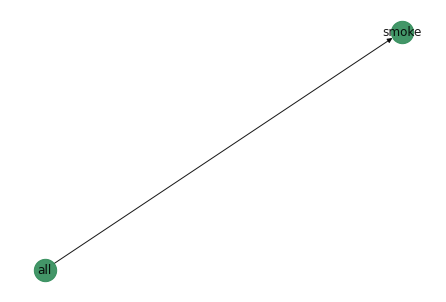

In [71]:
G = printGraph(pairs)

In [13]:
displacy.render(doc1, style='dep')